# Classification of Myocardial Infarction 

# Business Objective:


Myocardial Infarction(Commonly known as “Heart attack”)  is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which are exposed to chronic stress factors, irregular and not always balanced nutrition.

The Given dataset consists of 124 variables with 1700 records of patients.Need to  classify the Lethal outcome (cause) (LET_IS)(Y variable) by using the given dataset.


# Identifying potential risk factors or predictors of the condition.

With 124 variables and 1700 records, the dataset is likely quite complex and may require some preprocessing and feature selection before analysis can be performed. It would be important to carefully examine the variables and their relationships to ensure that the analysis is meaningful and accurate.

Some potential approaches to analyzing the dataset could include building predictive models to identify patients at high risk of myocardial infarction, identifying common risk factors or comorbidities associated with the condition, or exploring patterns or trends in the data that could inform prevention or treatment strategies.

Overall, the dataset has the potential to yield valuable insights into the complex factors that contribute to myocardial infarction, and could help inform more effective approaches to preventing and treating this challenging condition

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
#Import the Libraries and read the data into a Pandas DataFrame

In [3]:
df = pd.read_csv(r"F:\Harshali Singh\DA and DS\Data Science\Project\2nd Project\Myocardial infarction complications.csv")
df.head()

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  
1         0    0       0          0       0  
2         0    0       0          0       0  
3         0    1       0          0       0  
4         0    0       0          0       0  

[5 rows x 124 columns]

In [4]:
df.tail()

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[5 rows x 124 columns]

In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  DLIT_AG  ZSN_A  nr_11  nr_01  nr_02  nr_03  nr_04  nr_07  \
0         0.0      7.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1         0.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2         0.0      2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3         0.0      3.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4         0.0      7.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   nr_08  np_01  np_04  np_05  np_07  np_08  np_09  np_10  endocr_01  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   

   endocr_02  endocr_03  zab_leg_01  zab_leg_02  zab_leg_03  zab_leg_04  \
0        0.0        0.0         0.0         0.0         0.0         0.0   
1        0.0        0.0         0.0         0.0         0.0         0.0   
2        0.0        0.0         0.0         0.0         0.0         0.0   
3        0.0        0.0         1.0         0.0         0.0         0.0   
4        0.0        0.0         0.0         0.0         0.0         0.0   

   zab_leg_06  S_AD_KBRIG  D_AD_KBRIG  S_AD_ORIT  D_AD_ORIT  O_L_POST  \
0         0.0         NaN         NaN      180.0      100.0       0.0   
1         0.0         NaN         NaN      120.0       90.0       0.0   
2         0.0       150.0       100.0      180.0      100.0       0.0   
3         0.0         NaN         NaN      120.0       70.0       0.0   
4         0.0       190.0       100.0      160.0       90.0       0.0   

   K_SH_POST  MP_TP_POST  SVT_POST  GT_POST  FIB_G_POST  ant_im  lat_im  \
0        0.0         0.0       0.0      0.0         0.0     1.0     0.0   
1        0.0         0.0       0.0      0.0         0.0     4.0     1.0   
2        0.0         0.0       0.0      0.0         0.0     4.0     1.0   
3        0.0         0.0       0.0      0.0         0.0     0.0     1.0   
4        0.0         0.0       0.0      0.0         0.0     4.0     1.0   

   inf_im  post_im  IM_PG_P  ritm_ecg_p_01  ritm_ecg_p_02  ritm_ecg_p_04  \
0     0.0      0.0      0.0            0.0            0.0            0.0   
1     0.0      0.0      0.0            1.0            0.0            0.0   
2     0.0      0.0      0.0            1.0            0.0            0.0   
3     1.0      0.0      0.0            1.0            0.0            0.0   
4     0.0      0.0      0.0            0.0            0.0            0.0   

   ritm_ecg_p_06  ritm_ecg_p_07  ritm_ecg_p_08  n_r_ecg_p_01  n_r_ecg_p_02  \
0            0.0            1.0            0.0           0.0           0.0   
1            0.0            0.0            0.0           0.0           0.0   
2            0.0            0.0            0.0           0.0           0.0   
3            0.0            0.0            0.0           0.0           0.0   
4            0.0            1.0            0.0           0.0           0.0   

   n_r_ecg_p_03  n_r_ecg_p_04  n_r_ecg_p_05  n_r_ecg_p_06  n_r_ecg_p_08  \
0           0.0           0.0           1.0           0.0           0.0   
1           0.0           1.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0          

In [8]:
df.tail()

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
1695  77.0    0       0.0        4.0        2.0       1.0       NaN  2.0   
1696  70.0    0       0.0        6.0        2.0       1.0       NaN  2.0   
1697  55.0    1       3.0        6.0        2.0       2.0       NaN  0.0   
1698  79.0    0       2.0        2.0        2.0       1.0       NaN  2.0   
1699  63.0    1       2.0        NaN        NaN       NaN       NaN  2.0   

      SIM_GIPERT  DLIT_AG  ZSN_A  nr_11  nr_01  nr_02  nr_03  nr_04  nr_07  \
1695         0.0      7.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1696         0.0      7.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1697         0.0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1698         0.0      7.0    NaN    0.0    0.0    0.0    0.0    1.0    0.0   
1699         0.0      NaN    4.0    0.0    0.0    0.0    0.0    0.0    0.0   

      nr_08  np_01  np_04  np_05  np_07  np_08  np_09  np_10  endocr_01  \
1695    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
1696    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
1697    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
1698    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   
1699    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0   

      endocr_02  endocr_03  zab_leg_01  zab_leg_02  zab_leg_03  zab_leg_04  \
1695        0.0        0.0         0.0         0.0         0.0         0.0   
1696        0.0        0.0         0.0         1.0         0.0         0.0   
1697        0.0        0.0         0.0         0.0         0.0         0.0   
1698        0.0        0.0         0.0         0.0         0.0         0.0   
1699        0.0        0.0         0.0         1.0         0.0         0.0   

      zab_leg_06  S_AD_KBRIG  D_AD_KBRIG  S_AD_ORIT  D_AD_ORIT  O_L_POST  \
1695         0.0         NaN         NaN      110.0       70.0       0.0   
1696         0.0         NaN         NaN       50.0        0.0       0.0   
1697         0.0         NaN         NaN       70.0       50.0       0.0   
1698         0.0         NaN         NaN      110.0       70.0       0.0   
1699         0.0         NaN         NaN        0.0        0.0       0.0   

      K_SH_POST  MP_TP_POST  SVT_POST  GT_POST  FIB_G_POST  ant_im  lat_im  \
1695        0.0         0.0       0.0      0.0         0.0     NaN     NaN   
1696        1.0         0.0       0.0      0.0         0.0     0.0     0.0   
1697        NaN         0.0       0.0      0.0         0.0     4.0     1.0   
1698        0.0         1.0       0.0      0.0         0.0     NaN     NaN   
1699        1.0         0.0       0.0      0.0         1.0     0.0     0.0   

      inf_im  post_im  IM_PG_P  ritm_ecg_p_01  ritm_ecg_p_02  ritm_ecg_p_04  \
1695     0.0      0.0      0.0            1.0            0.0            0.0   
1696     2.0      1.0      0.0            1.0            0.0            0.0   
1697     0.0      0.0      0.0            NaN            NaN            NaN   
1698     NaN      NaN      0.0            0.0            1.0            0.0   
1699     2.0      0.0      0.0            0.0            0.0            0.0   

      ritm_ecg_p_06  ritm_ecg_p_07  ritm_ecg_p_08  n_r_ecg_p_01  n_r_ecg_p_02  \
1695            0.0            0.0            0.0           0.0           0.0   
1696            0.0            0.0            0.0           0.0           0.0   
1697            NaN            NaN            NaN           NaN           NaN   
1698            0.0            0.0            0.0           0.0           0.0   
1699            0.0            1.0            0.0           0.0           0.0   

      n_r_ecg_p_03  n_r_ecg_p_04  n_r_ecg_p_05  n_r_ecg_p_06  n_r_ecg_p_08  \
1695           0.0           0.0           0.0           0.0           0.0   
1696           0.0           0.0           0.0           0.0           0.0   
1697           NaN           NaN       

In [9]:
df.describe()

AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000   
mean      1.160703   0.37500     1.393258     0.033688     3.340220   
std       0.801400   0.48752     1.088803     0.180478     3.098646   
min       0.000000   0.00000     0.000000     0.000000     0.000000   
25%       0.000000   0.00000     0.000000     0.000000     0.000000   
50%       1.000000   0.00000     2.000000     0.000000     3.000000   
75%       2.000000   1.00000     2.000000     0.000000     7.000000   
max       2.000000   1.00000     3.000000     1.000000     7.000000   

             ZSN_A        nr_11        nr_01        nr_02        nr_03  \
count  1646.000000  1679.000000  1679.000000  1679.000000  1679.000000   
mean      0.194411     0.025015     0.002382     0.011316     0.020846   
std       0.658722     0.156217     0.048766     0.105806     0.142910   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       4.000000     1.000000     1.000000     1.000000     1.000000   

             nr_04        nr_07        nr_08        np_01        np_04  \
count  1679.000000  1679.000000  1679.000000  1682.000000  1682.000000   
mean      0.017272     0.000596     0.002382     0.001189     0.001784   
std       0.130323     0.024405     0.048766     0.034473     0.042207   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             np_05        np_07        np_08        np_09        np_10  \
count  1682.000000  1682.000000  1682.000000  1682.000000  1682.000000   
mean      0.006540     0.000595     0.003567     0.001189     0.001784   
std       0.080628     0.024383     0.059637     0.034473     0.042207   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         endocr_01    endocr_02    endocr_03   zab_leg_01   zab_leg_02  \
count  1689.000000  1690.000000  1690.000000  1693.000000  1693.000000   
mean      0.134991     0.024852     0.007692     0.079149     0.071471   
std       0.341815     0.155720     0.087394     0.270052     0.257686   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        zab_leg_03   zab_leg_04   zab_le

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [11]:
df.shape

(1700, 123)

In [12]:
df.columns

Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=123)

In [13]:
df.isnull().sum()

AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
FK_STENOK     73
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 123, dtype: int64

In [14]:
df.ndim

2

In [15]:
#checking for unique vales
df.nunique()

AGE          62
SEX           2
INF_ANAM      4
STENOK_AN     7
FK_STENOK     5
             ..
DRESSLER      2
ZSN           2
REC_IM        2
P_IM_STEN     2
LET_IS        8
Length: 123, dtype: int64

In [16]:
#Checking for missing data
df.isna().any()

AGE           True
SEX          False
INF_ANAM      True
STENOK_AN     True
FK_STENOK     True
             ...  
DRESSLER     False
ZSN          False
REC_IM       False
P_IM_STEN    False
LET_IS       False
Length: 123, dtype: bool

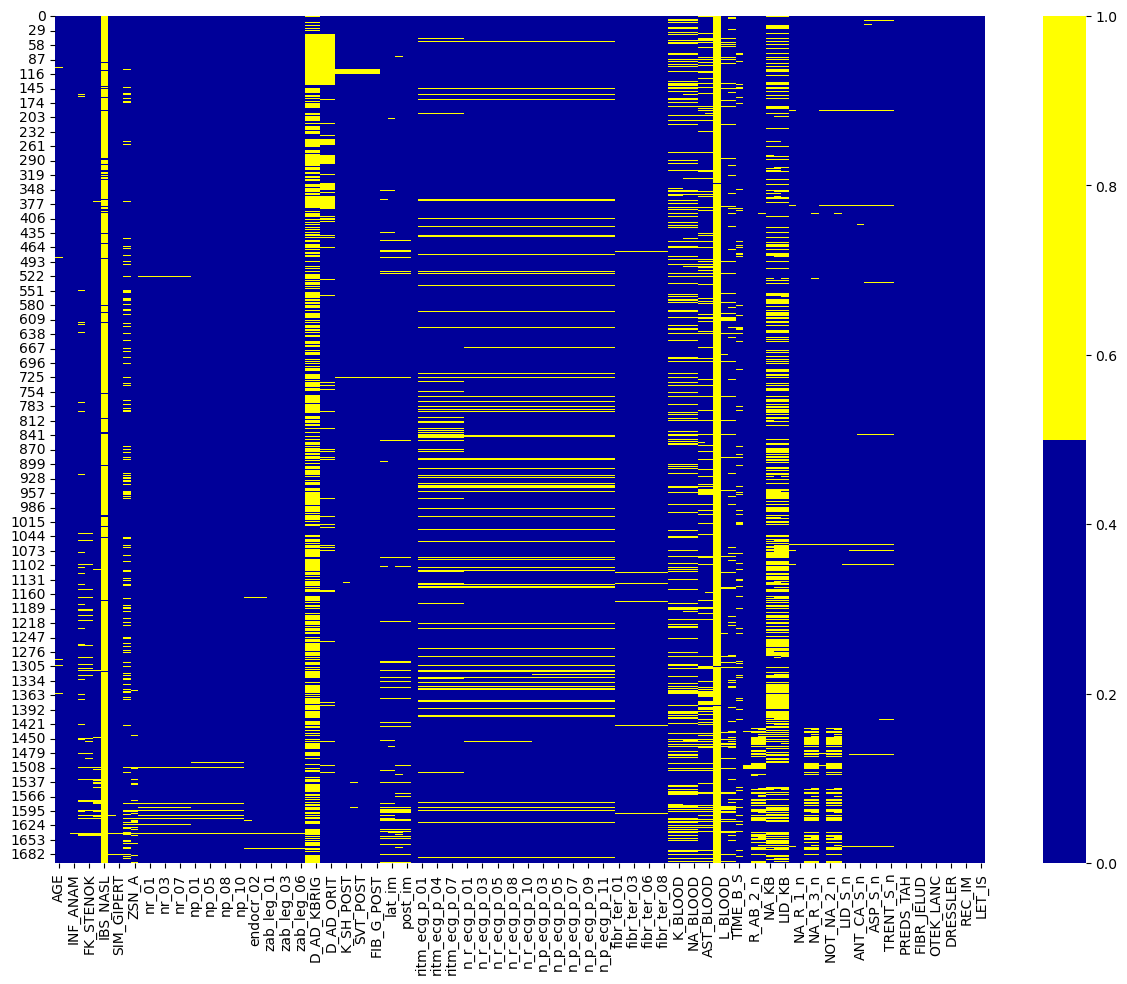

In [17]:
#heatmap for NA values
plt.figure(figsize=(15,11))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(df.isnull(),
            cmap = sns.color_palette(colours))
plt.show()

In [18]:
#Identify columns with missing values
for col_name in df.columns: 
    print ("column:",col_name,".Missing:",sum(df[col_name].isnull()))

column: AGE .Missing: 8
column: SEX .Missing: 0
column: INF_ANAM .Missing: 4
column: STENOK_AN .Missing: 106
column: FK_STENOK .Missing: 73
column: IBS_POST .Missing: 51
column: IBS_NASL .Missing: 1628
column: GB .Missing: 9
column: SIM_GIPERT .Missing: 8
column: DLIT_AG .Missing: 248
column: ZSN_A .Missing: 54
column: nr_11 .Missing: 21
column: nr_01 .Missing: 21
column: nr_02 .Missing: 21
column: nr_03 .Missing: 21
column: nr_04 .Missing: 21
column: nr_07 .Missing: 21
column: nr_08 .Missing: 21
column: np_01 .Missing: 18
column: np_04 .Missing: 18
column: np_05 .Missing: 18
column: np_07 .Missing: 18
column: np_08 .Missing: 18
column: np_09 .Missing: 18
column: np_10 .Missing: 18
column: endocr_01 .Missing: 11
column: endocr_02 .Missing: 10
column: endocr_03 .Missing: 10
column: zab_leg_01 .Missing: 7
column: zab_leg_02 .Missing: 7
column: zab_leg_03 .Missing: 7
column: zab_leg_04 .Missing: 7
column: zab_leg_06 .Missing: 7
column: S_AD_KBRIG .Missing: 1076
column: D_AD_KBRIG .Missing

In [19]:
missing_columns=df.columns[df.isnull().any()]
missing_columns

Index(['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL',
       'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A',
       ...
       'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n'],
      dtype='object', length=110)

In [20]:
# fill in missing values with mode for each column
for col in missing_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [21]:
#Identify columns with missing values
for col_name in df.columns: 
    print ("column:",col_name,".Missing:",sum(df[col_name].isnull()))

column: AGE .Missing: 0
column: SEX .Missing: 0
column: INF_ANAM .Missing: 0
column: STENOK_AN .Missing: 0
column: FK_STENOK .Missing: 0
column: IBS_POST .Missing: 0
column: IBS_NASL .Missing: 0
column: GB .Missing: 0
column: SIM_GIPERT .Missing: 0
column: DLIT_AG .Missing: 0
column: ZSN_A .Missing: 0
column: nr_11 .Missing: 0
column: nr_01 .Missing: 0
column: nr_02 .Missing: 0
column: nr_03 .Missing: 0
column: nr_04 .Missing: 0
column: nr_07 .Missing: 0
column: nr_08 .Missing: 0
column: np_01 .Missing: 0
column: np_04 .Missing: 0
column: np_05 .Missing: 0
column: np_07 .Missing: 0
column: np_08 .Missing: 0
column: np_09 .Missing: 0
column: np_10 .Missing: 0
column: endocr_01 .Missing: 0
column: endocr_02 .Missing: 0
column: endocr_03 .Missing: 0
column: zab_leg_01 .Missing: 0
column: zab_leg_02 .Missing: 0
column: zab_leg_03 .Missing: 0
column: zab_leg_04 .Missing: 0
column: zab_leg_06 .Missing: 0
column: S_AD_KBRIG .Missing: 0
column: D_AD_KBRIG .Missing: 0
column: S_AD_ORIT .Missing

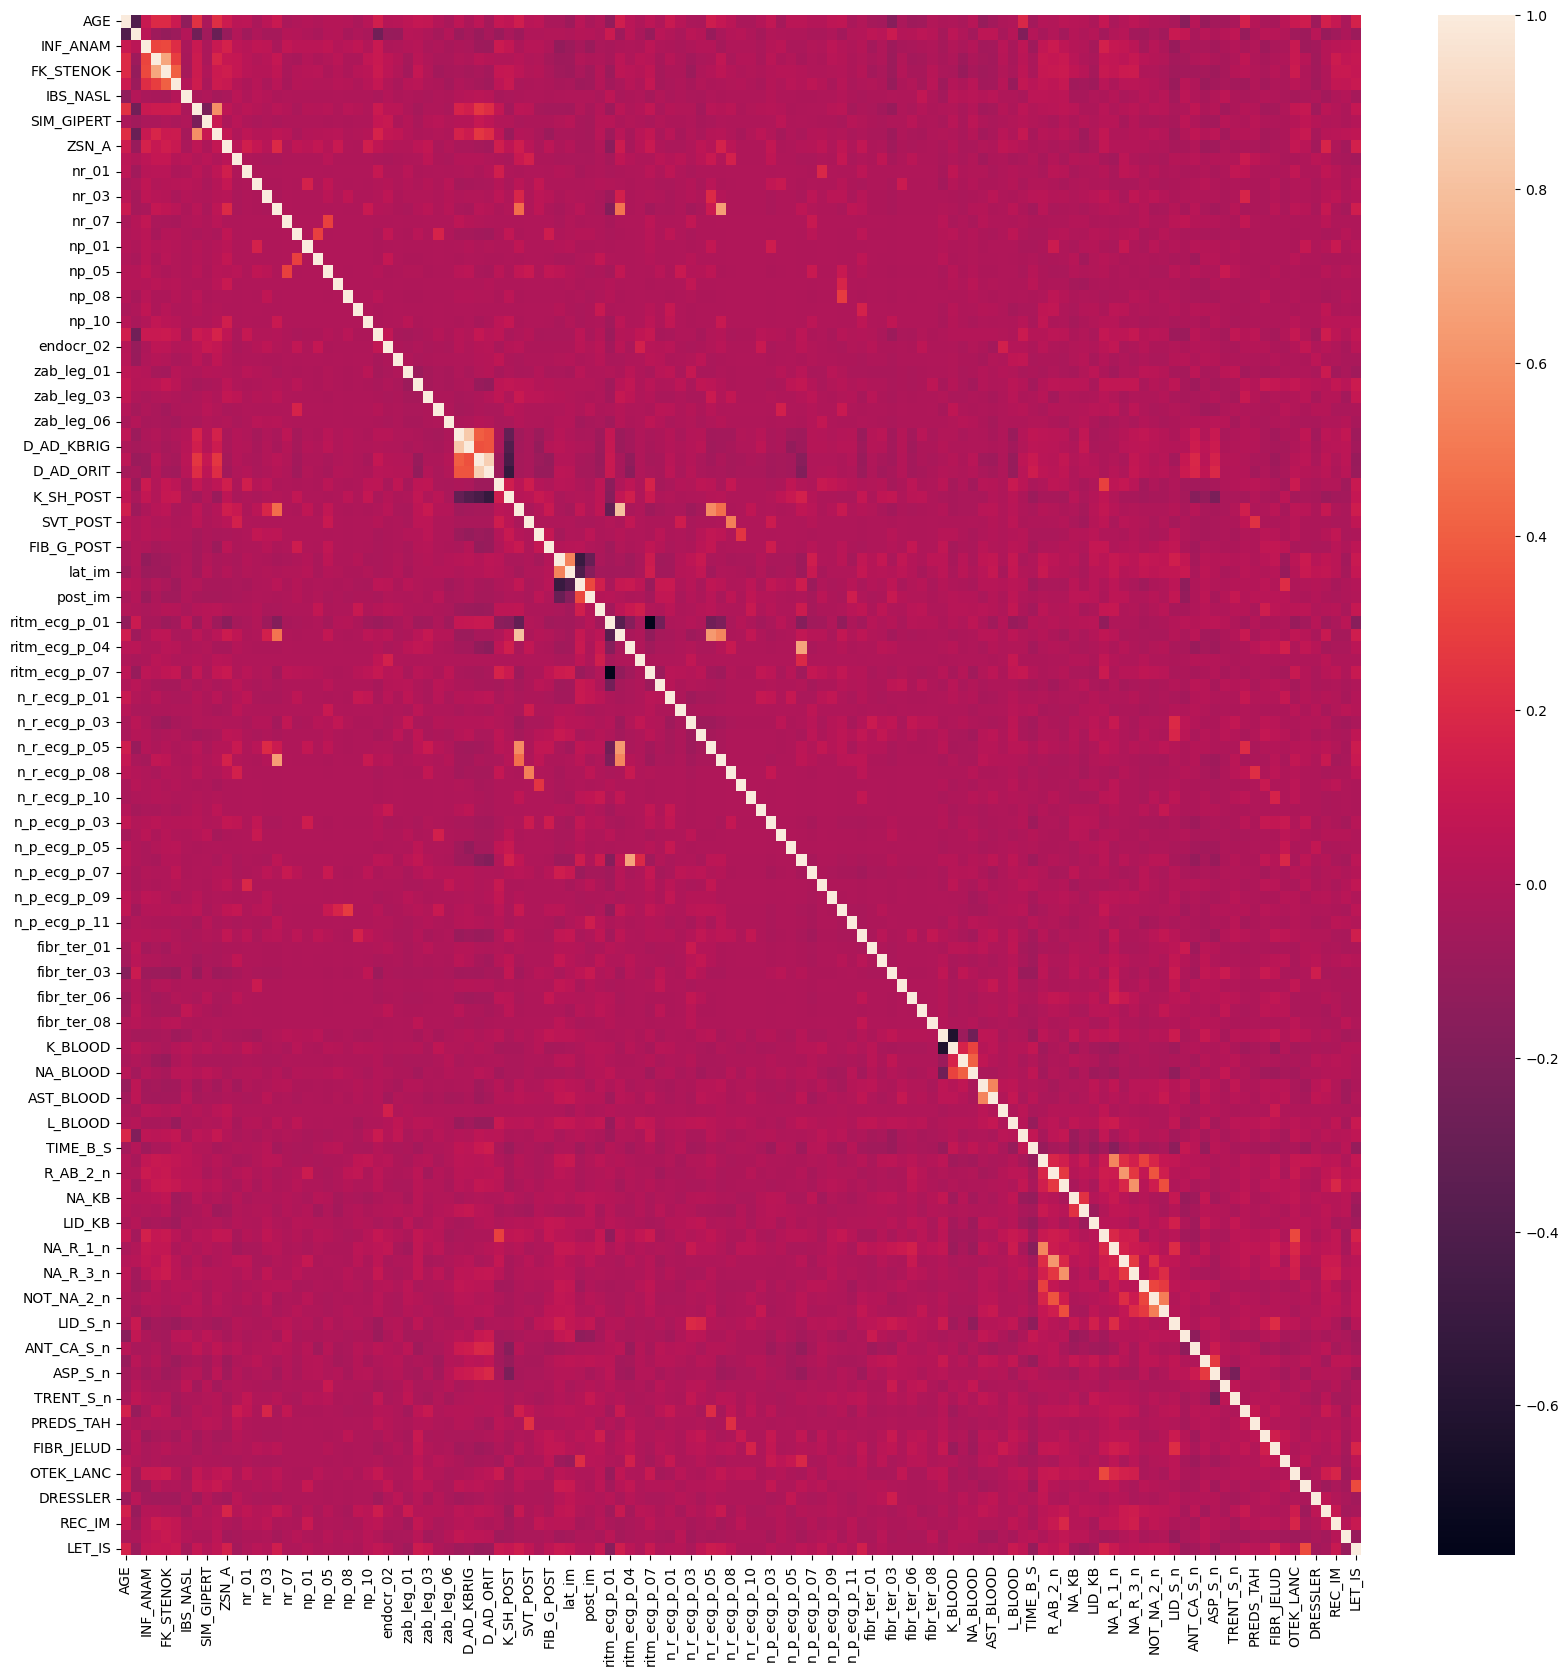

In [22]:
plt.figure(figsize=(20,20))
sns .heatmap(df.corr())
plt.show()

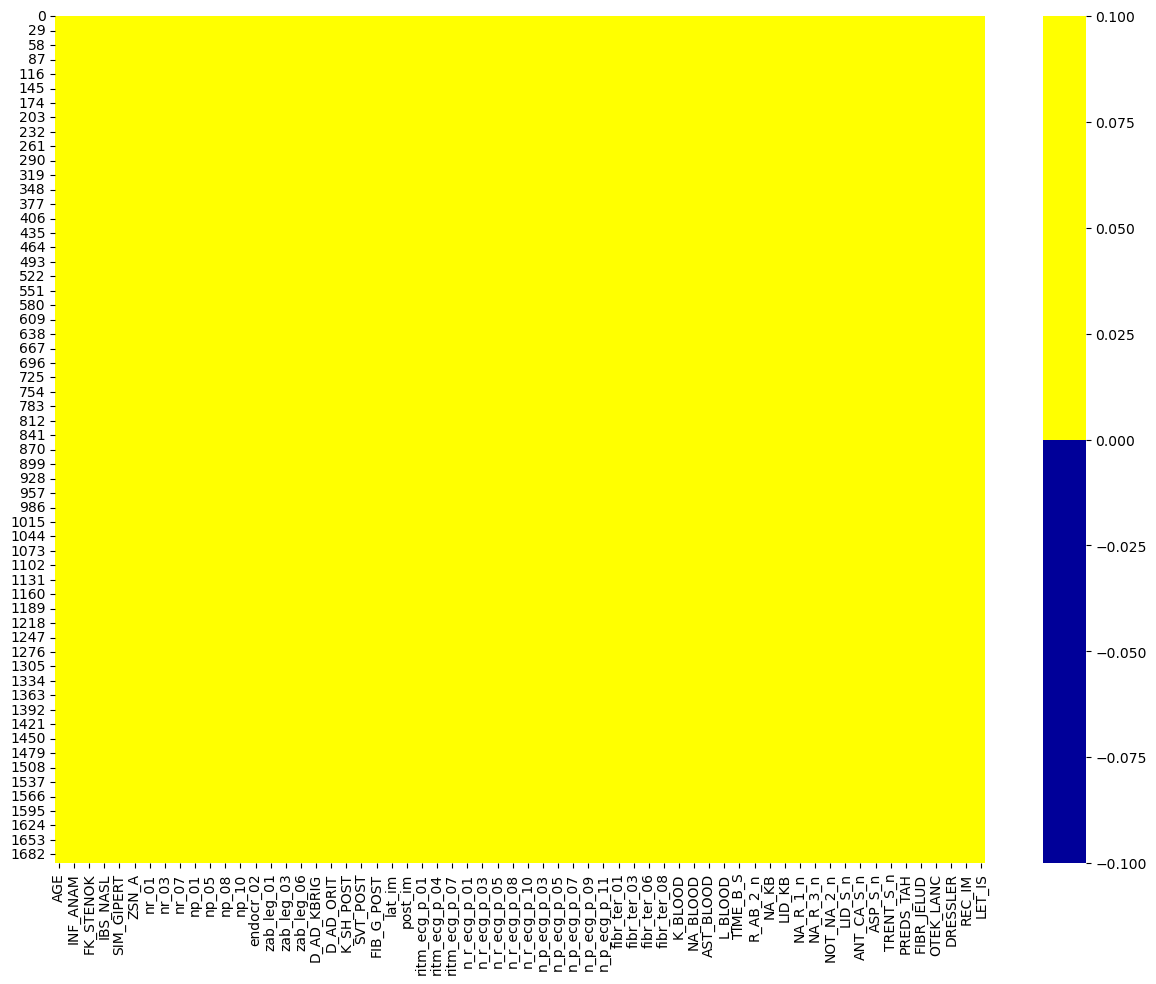

In [23]:
plt.figure(figsize=(15,11))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(df.isnull(),
            cmap = sns.color_palette(colours))
plt.show()

In [24]:
#checking for duplicate records
df[df.index.duplicated()]

Empty DataFrame
Columns: [AGE, SEX, INF_ANAM, STENOK_AN, FK_STENOK, IBS_POST, IBS_NASL, GB, SIM_GIPERT, DLIT_AG, ZSN_A, nr_11, nr_01, nr_02, nr_03, nr_04, nr_07, nr_08, np_01, np_04, np_05, np_07, np_08, np_09, np_10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, S_AD_KBRIG, D_AD_KBRIG, S_AD_ORIT, D_AD_ORIT, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, ant_im, lat_im, inf_im, post_im, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, K_BLOOD, GIPER_NA, NA_BLOOD, ALT_BLOOD, AST_BLOOD, KFK_BLOOD, L_BLOOD, ROE, TIME_B_S, R_AB_1_n, R_AB_2_n, R_AB_3_n, NA_KB, NOT_NA_KB, LID_KB, NITR_S, NA_R_1_n, NA_R_2_n, ...]
Index: []

# Visualization

# AgeWise Lethal Outcome

<AxesSubplot:xlabel='LET_IS', ylabel='AGE'>

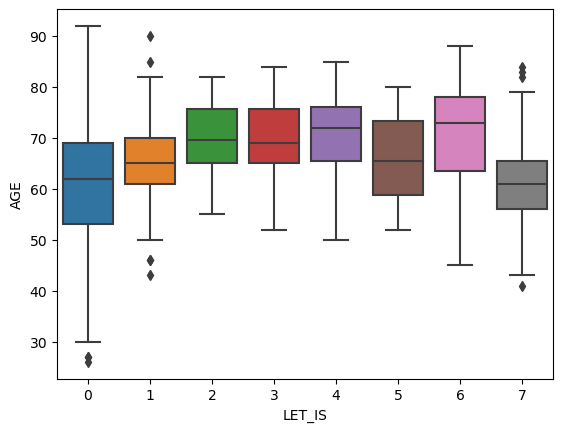

In [25]:
sns.boxplot(x='LET_IS',y='AGE',data=df)

# Observation:

As we can observe maximum Lethal Outcome cause is ranging between 50 to 80 age

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is 

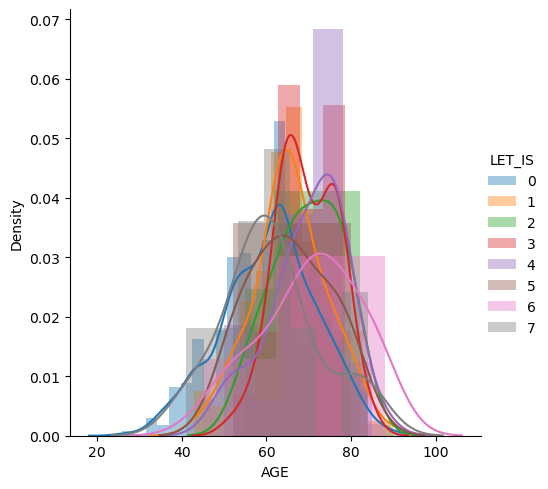

In [26]:
sns.FacetGrid(df,hue='LET_IS',size=5).map(sns.distplot,'AGE').add_legend()

# GenderWise Lethal Outcome

Gender (SEX): Nominal Cases Fraction

0: female 635 37.35%

1: male 1065 62.65%

Missing 0 0%

In [27]:
df['SEX'].value_counts()

1    1065
0     635
Name: SEX, dtype: int64

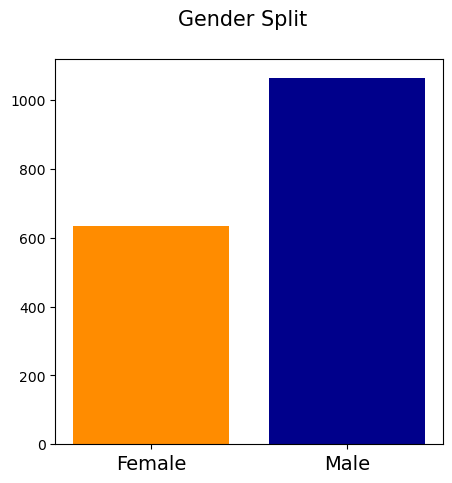

In [28]:
fig, ax = plt.subplots(1, figsize=(5,5))
plt.suptitle('Gender Split', fontsize=15)
ax.bar(df['SEX'].value_counts().index, 
       df['SEX'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Female','Male'], fontsize = 14);

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


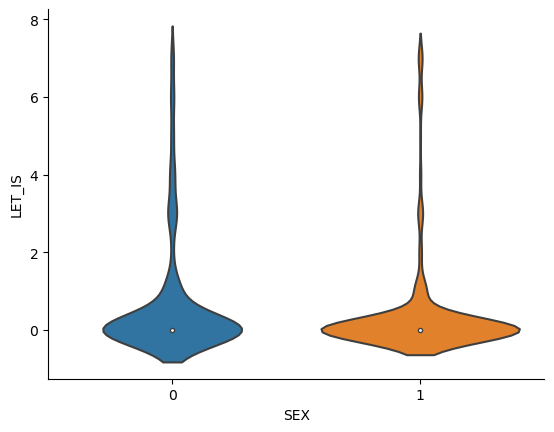

In [29]:
#Violin Plot
sns.violinplot(df['SEX'], df['LET_IS']) #Variable Plot
sns.despine()

In [30]:
fig = px.bar(df, x='AGE', y='LET_IS', color='SEX')
# showing the plot
fig.show()

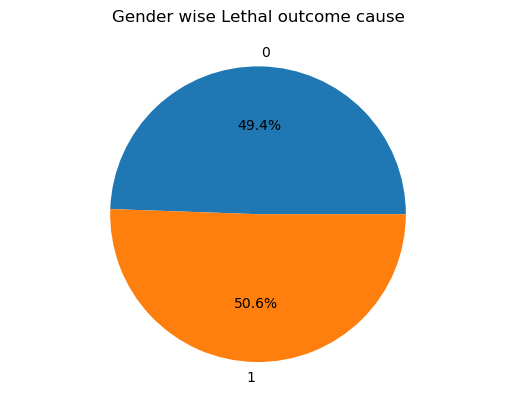

In [31]:
#Pie chart
var=df.groupby(['SEX']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['LET_IS']
label_list = temp.index
plt.axis("equal")
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Gender wise Lethal outcome cause") 
plt.show()

# Observation

We can observe that Lethal outcome (cause) number of male is high as compare to female

[]

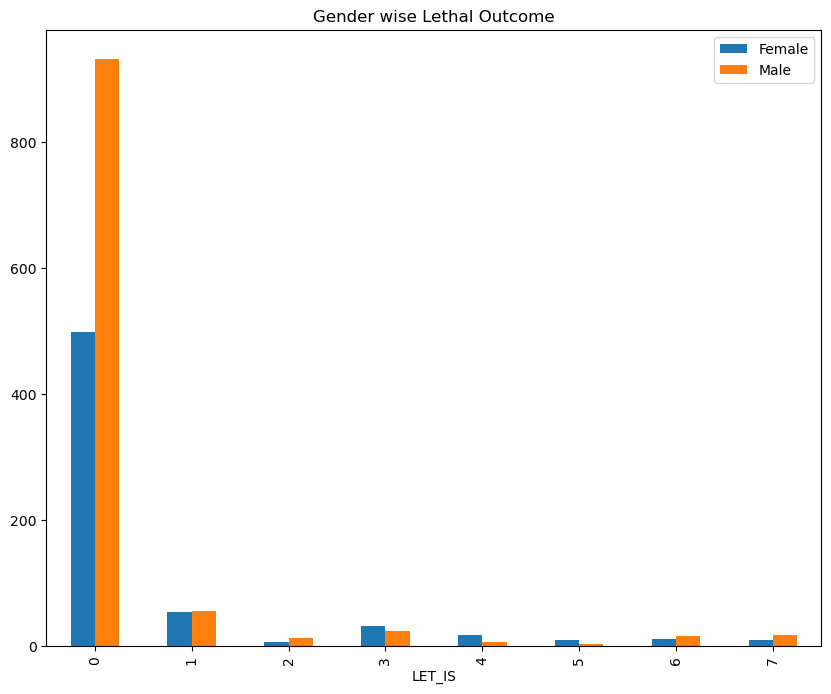

In [36]:
pd.crosstab(df['LET_IS'], df['SEX']).plot(kind="bar", figsize=(10, 8), title="Gender wise Lethal Outcome")
plt.legend(['Female','Male'],loc="upper right")
plt.plot()

# Observations:
    
The highest lethal outcome is of unknown (alive) in the Male while less in Female.

In [32]:
#dependent variable
df['LET_IS'].value_counts()

0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

In [33]:
#displaying data by pie chart
fig = px.pie(df['LET_IS'],names='LET_IS',title='Lethal outcome')
fig.show()

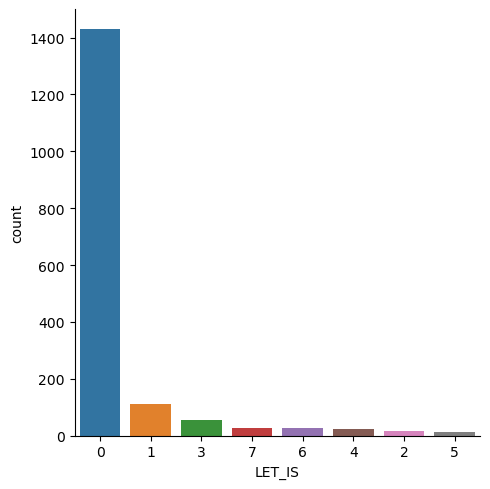

In [34]:
# Create pie chart
sns.catplot(x='LET_IS', kind="count",data=df, order = df['LET_IS'].value_counts().index)

# Observations:

We can observe that the highest lethal outcome is of unknown (alive) 1429.
The lowest is of thromboembolism 12

# Outliers of continuous features

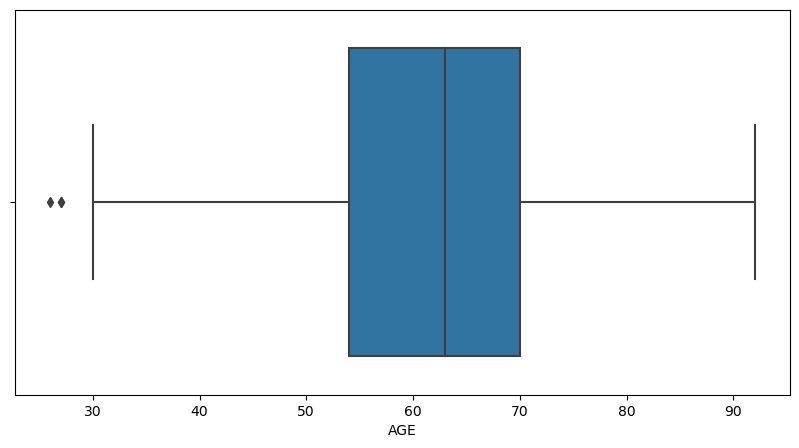

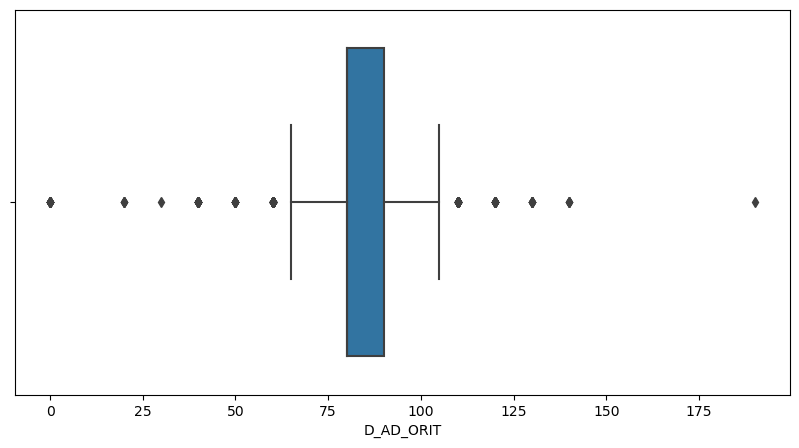

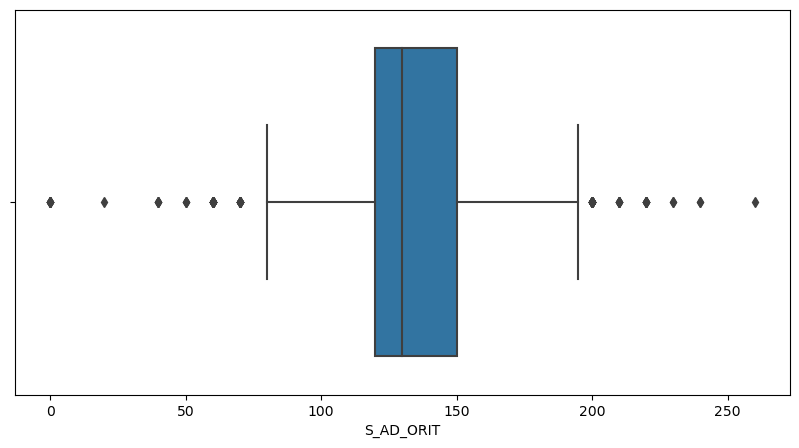

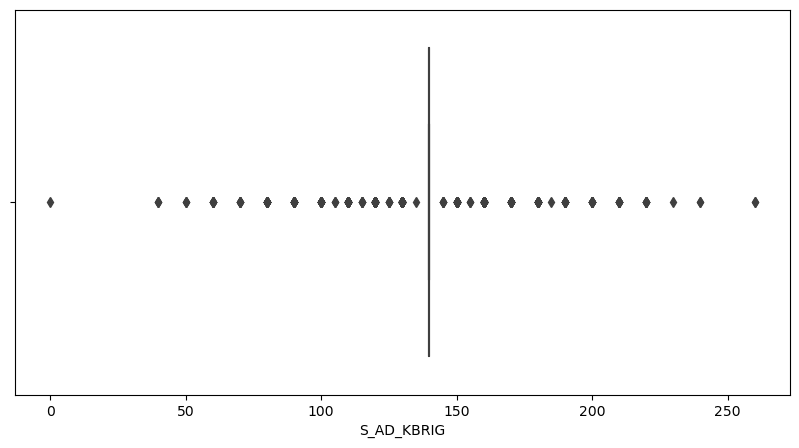

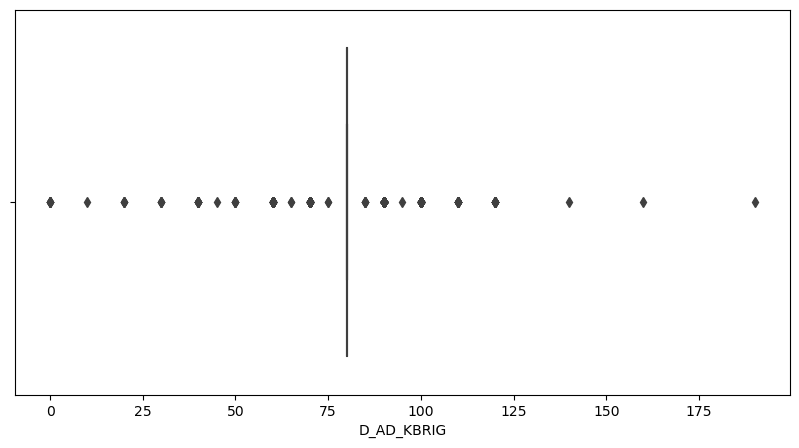

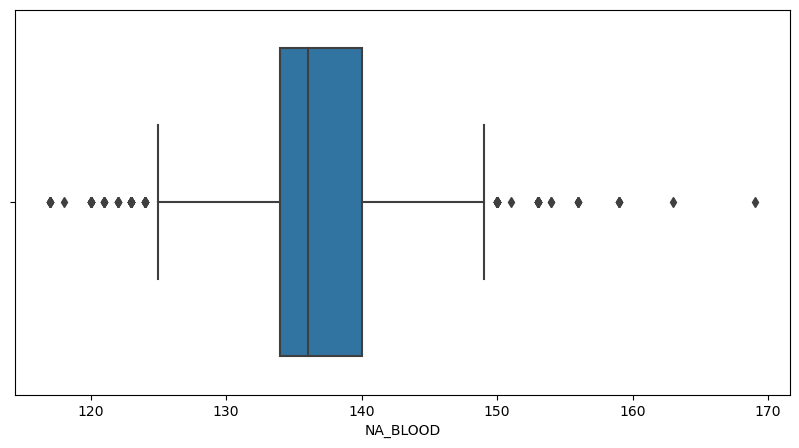

In [37]:
cols = ['AGE','D_AD_ORIT','S_AD_ORIT','S_AD_KBRIG','D_AD_KBRIG','NA_BLOOD']

i=1
for col in cols:
    plt.figure(figsize=(10,35))
    plt.subplot(6,1,i)
    sns.boxplot(x=col, data= df)
    i+=1
plt.show()

# Feature Engineering

In [38]:
X = df.drop('LET_IS', axis=1)
Y = df[['LET_IS']]

# Feature Selection

In [47]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)
scores = fit.scores_
features = fit.transform(X)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [48]:
scoredf = pd.DataFrame(list(zip(scores, X)),
               columns =['Score', 'Feature'])
scoredf.sort_values(by="Score", ascending=False, inplace=True,ignore_index=True)
scoredf.head(10)

Score       Feature
0  0.156375        RAZRIV
1  0.088060     S_AD_ORIT
2  0.080186     D_AD_ORIT
3  0.057596     K_SH_POST
4  0.054873    S_AD_KBRIG
5  0.045470           ZSN
6  0.043541  n_p_ecg_p_11
7  0.043310         ZSN_A
8  0.039838      GIPER_NA
9  0.039418    FIBR_JELUD

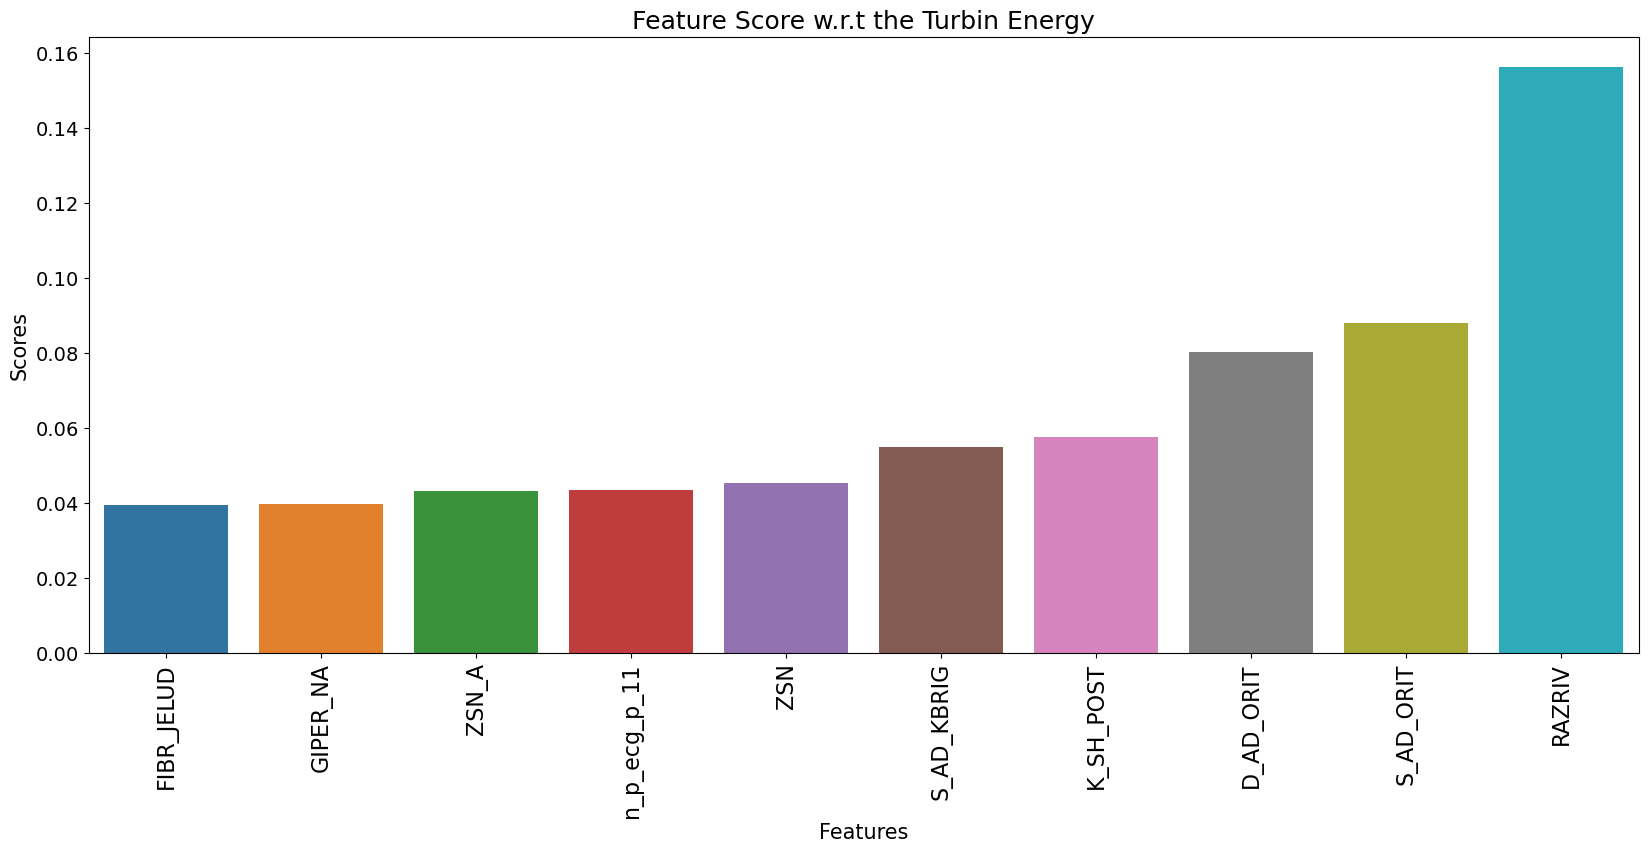

In [50]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=scoredf.head(10), 
            order=scoredf.head(10).sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Turbin Energy", size=18)
plt.show()

In [53]:
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X, Y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.p

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.p

In [54]:
# Feature Ranking:
feature_rankings = fit.ranking_
feature_rankings

array([ 83,   1,  51,  71,  68,  41,  53,  76,  45,  81,   8,   7,  21,
        47,  19,  29, 108,  99,  92,  95,  37, 106,  66, 105,  96,   9,
        23,  63,  22,   2,  12,  93,  61,  89,  88,  87,  86,  32,   1,
        25,   5,  85,  34,  69,  43,  70,  42,   1,  49,   1,  75, 102,
        64,  36,  40,  90,  11,  14,   6,  46,  79, 104, 101, 100,   3,
        30, 107,  33,  38,  73,  77,  59,  58,   1,  91,  78,  67,  65,
        98, 103,  97,  31,  20,  55,  84,  35,   1,  62,  82,  94,  80,
        74,  44,   4,  27,   1,  16,   1,  60,  54,  57,  72,  24,  17,
        50,  13,  28,  26,   1,  10,  48,  52,  18,  15,   1,  56,   1,
         1,  39,   1,   1,   1])

In [55]:
# sort the rankings in descending order
sorted_rankings = sorted(range(len(feature_rankings)), key=lambda k: feature_rankings[k], reverse=True)

# select the top 10 features based on their ranking
top_10_features = sorted_rankings[:10]

# print the top 10 features
print(top_10_features)

[16, 66, 21, 23, 61, 79, 51, 62, 63, 17]


In [56]:
# get the top 10 feature names
feature_names = X.columns[top_10_features]
# printing the top 10 feature names
print(feature_names)

Index(['nr_07', 'n_p_ecg_p_05', 'np_07', 'np_09', 'n_r_ecg_p_09',
       'fibr_ter_07', 'ritm_ecg_p_06', 'n_r_ecg_p_10', 'n_p_ecg_p_01',
       'nr_08'],
      dtype='object')


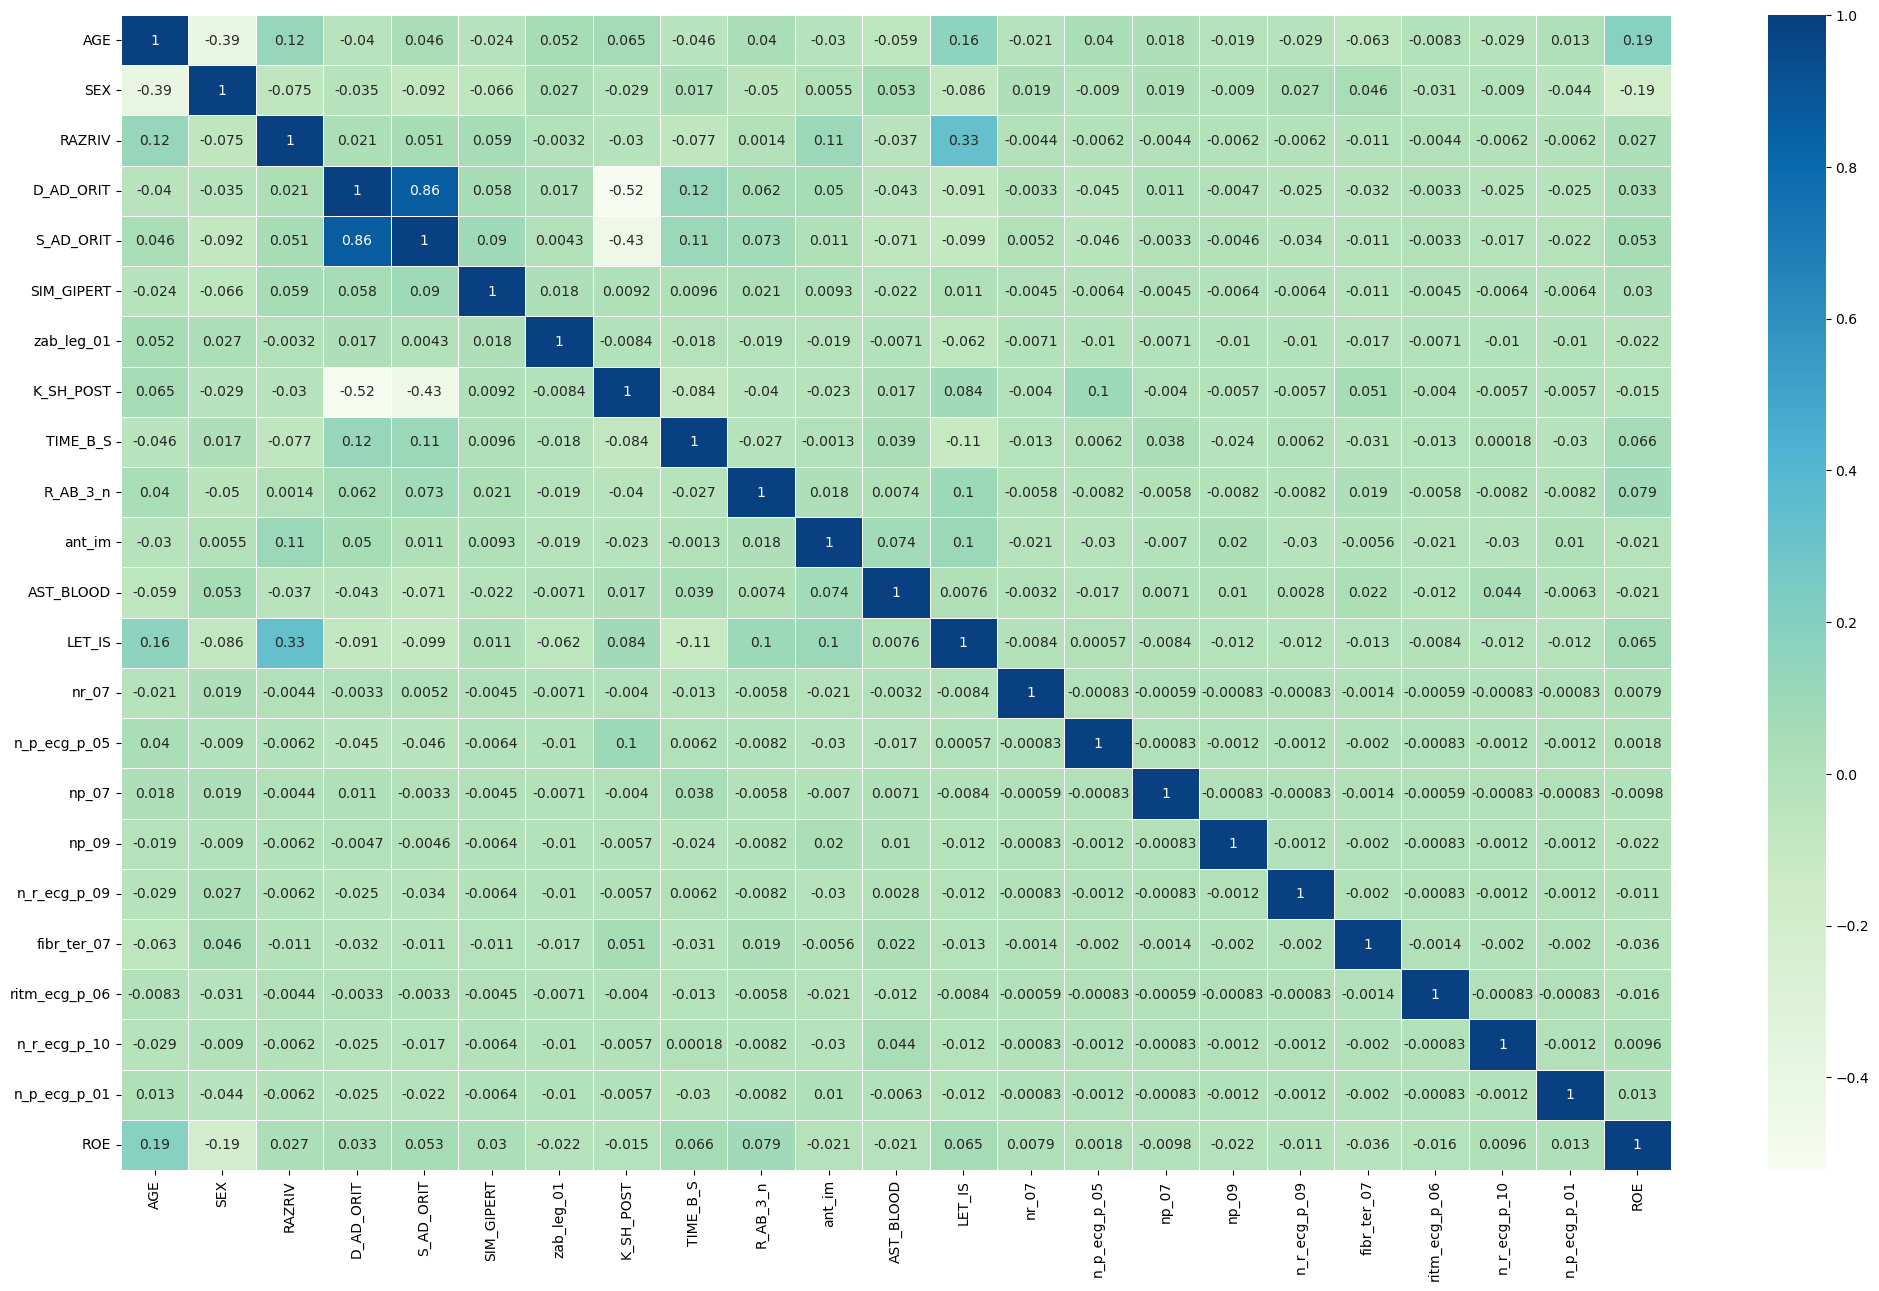

In [58]:
# Checking correlation of features selected by RFE with target column also checking impact of different features on target.

plt.figure(figsize = (25,15))
sns.heatmap(df[['AGE','SEX','RAZRIV','D_AD_ORIT','S_AD_ORIT','SIM_GIPERT','zab_leg_01','K_SH_POST','TIME_B_S',
                  'R_AB_3_n','ant_im','AST_BLOOD','LET_IS','nr_07', 'n_p_ecg_p_05', 'np_07', 'np_09', 'n_r_ecg_p_09',
                  'fibr_ter_07', 'ritm_ecg_p_06', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'ROE']].corr(), cmap='GnBu', annot=True,linewidth=.5)
plt.show()

In [60]:
dep_cor = df.corr()[['LET_IS']].T.style.background_gradient('copper_r')
dep_cor

In [61]:
data=df.copy()

In [62]:
newdf = data[['AGE','SEX','RAZRIV','D_AD_ORIT','S_AD_ORIT','SIM_GIPERT','ROE','K_SH_POST','TIME_B_S',
             'R_AB_3_n','ant_im','AST_BLOOD','IBS_POST','LET_IS']]
newdf

AGE  SEX  RAZRIV  D_AD_ORIT  S_AD_ORIT  SIM_GIPERT   ROE  K_SH_POST  \
0     77.0    1       0      100.0      180.0         0.0  16.0        0.0   
1     55.0    1       0       90.0      120.0         0.0   3.0        0.0   
2     52.0    1       0      100.0      180.0         0.0   5.0        0.0   
3     68.0    0       0       70.0      120.0         0.0   5.0        0.0   
4     60.0    1       0       90.0      160.0         0.0   5.0        0.0   
...    ...  ...     ...        ...        ...         ...   ...        ...   
1695  77.0    0       1       70.0      110.0         0.0   6.0        0.0   
1696  70.0    0       0        0.0       50.0         0.0   5.0        1.0   
1697  55.0    1       0       50.0       70.0         0.0  13.0        0.0   
1698  79.0    0       0       70.0      110.0         0.0   4.0        0.0   
1699  63.0    1       0        0.0        0.0         0.0   5.0        1.0   

      TIME_B_S  R_AB_3_n  ant_im  AST_BLOOD  IBS_POST  LET_IS  
0          4.0       1.0     1.0       0.15       2.0       0  
1          2.0       0.0     4.0       0.18       0.0       0  
2          3.0       0.0     4.0       0.11       2.0       0  
3          2.0       1.0     0.0       0.37       2.0       0  
4          9.0       0.0     4.0       0.22       2.0       0  
...        ...       ...     ...        ...       ...     ...  
1695       2.0       0.0     0.0       0.52       1.0       3  
1696       2.0       0.0     0.0       0.15       1.0       1  
1697       1.0       0.0     4.0       0.15       2.0       6  
1698       2.0       0.0     0.0       0.45       1.0       1  
1699       1.0       0.0     0.0       0.15       2.0       1  

[1700 rows x 14 columns]